In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum
from collections import defaultdict
import Solver_V3
import utilities as util

# Data Reading

In [2]:
df = pd.read_csv("fixed_data.csv", encoding="latin1")
df = df[df["ID"] > 60] #This is because the first few rows were faulty.

In [3]:
#df.rename(columns={'Ethical technology assessment?':'Ethical technology assessment'}, inplace=True)

bach = df[df['program'] == 'bachelor'] #select the bachelor tuples in a df
mast = df[df['program'] == 'master'] #select the master tuples in a df

b_aal = bach[bach['campus'] == 'AAL'] #select the bachelor aal tuples in a df
m_aal = mast[mast['campus'] == 'AAL'] #select the master aal tuples in a df

b_cph = bach[bach['campus'] == 'CPH'] #select the bachelor cph tuples in a df
m_cph = mast[mast['campus'] == 'CPH'] #select the master cph tuples in a df

esb = df[df['campus'] == 'ESB'] #select the esb tuples in a df

In [4]:
col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4' 
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

courses_b_aal = sorted(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3])) #Workshops available for bachelor aal, based on the top 3 selected
courses_m_aal = sorted(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3])) #Workshops available for master aal, based on the top 3 selected

courses_b_cph = sorted(set(b_cph[col1]) | set(b_cph[col2]) | set(b_cph[col3])) #Workshops available for bachelor cph, based on the top 3 selected
courses_m_cph = sorted(set(m_cph[col1]) | set(m_cph[col2]) | set(m_cph[col3])) #Workshops available for master cph, based on the top 3 selected

courses_esb = sorted(set(esb[col1]) | set(esb[col2]) | set(esb[col3])) #Workshops available for esb, based on the top 3 selected


#Select columns from the course names, where each column has NaN, 1, 2, 3 indicating top 3 preference or not
pref_b_aal = b_aal[courses_b_aal] 
pref_m_aal = m_aal[courses_m_aal] 

pref_b_cph = b_cph[courses_b_cph]
pref_m_cph = m_cph[courses_m_cph]

pref_esb = esb[courses_esb]

### Preference Charts

In [5]:
from collections import defaultdict

In [6]:
dictionary_pref_b_aal = defaultdict(int)
for i, row in pref_b_aal.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            dictionary_pref_b_aal[j+1] += 1

dictionary_pref_m_aal = defaultdict(int)
for i, row in pref_m_aal.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            dictionary_pref_m_aal[j+1] += 1

dictionary_pref_b_cph = defaultdict(int)
for i, row in pref_b_cph.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            dictionary_pref_b_cph[j+1] += 1

dictionary_pref_m_cph = defaultdict(int)
for i, row in pref_m_cph.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            dictionary_pref_m_cph[j+1] += 1

dictionary_pref_esb = defaultdict(int)
for i, row in pref_esb.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            dictionary_pref_esb[j+1] += 1

C:\Users\tatyf\AppData\Local\Temp\ipykernel_23540\258107742.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\tatyf\AppData\Local\Temp\ipykernel_23540\258107742.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\tatyf\AppData\Local\Temp\ipykernel_23540\258107742.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\tatyf\AppData\Local\Temp\ipykernel_

In [7]:
print(dictionary_pref_esb)

defaultdict(<class 'int'>, {10: 2, 6: 2, 14: 2, 13: 3, 8: 2, 17: 6, 7: 2, 3: 2, 11: 4, 1: 2, 5: 1, 4: 2, 12: 1, 9: 2})


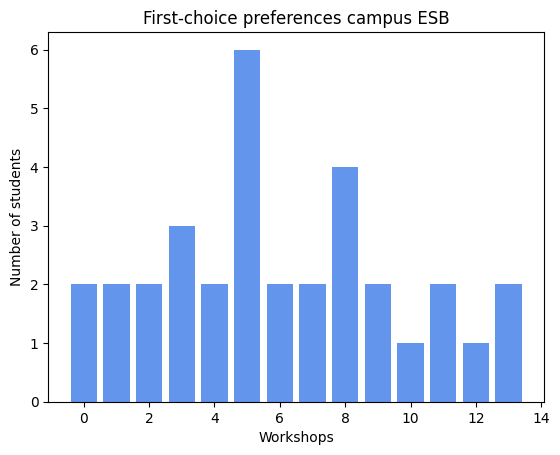

In [8]:
workshops = list(dictionary_pref_esb.keys())
students = list(dictionary_pref_esb.values())
plt.bar(range(len(workshops)), students, color='cornflowerblue') #cornflowerblue royalblue
plt.xlabel('Workshops')
plt.ylabel('Number of students')
plt.title('First-choice preferences campus ESB')
plt.show()

In [9]:
for i in range(len(courses_esb)):
    print(i, courses_esb[i])

0 Clarification of individual professional competences
1 Collaboration across discplines
2 Creativity and entrepeneurship
3 Digital and hybrid practices in collaborative work
4 Digital practices in project work
5 Ethical technology assessment
6 Facilitation of productive meeting
7 Generative AI in study practices?
8 Interdisciplinary problem design
9 Leadership and project management
10 Motivation, well-being and work-life balance?
11 Professional communication with external partners
12 Professional identity development
13 Psychological safety in team work
14 Psychological safety in teamwork
15 SCRUM-techniques in project work?
16 Systems thinking in engineering


In [10]:
pref_m_aal.head()

,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
13,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN
15,NaN,1.0,3.0,NaN,NaN,2.0,NaN,NaN
20,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
21,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
24,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN


In [11]:
pref_esb.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
11,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
16,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0


Set students’s preferences

In [12]:
# Example:
util.get_dict(pref_m_aal, 1)                     # To obtain the preference of student 
                                                 # s for option i, use t_pref[s][i]

{1: 1, 2: 5, 3: 2}

# Implementation

## AAL magister

In [13]:
# Select program and campus
pref = pref_m_aal

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

D[1] = 1                                # Workshop 1 is a full-day workshop.
C = [6, 6]                              # capacity of workshops by time slot (AM, PM)
U = [70 for _ in range(pref.shape[1])]  # capacity of each workshop (all with 80 seats)

print("There are", len(pref), "students; take this into account when choosing capacity and number of workshops")

pref.head()

There are 393 students; take this into account when choosing capacity and number of workshops


,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
13,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN
15,NaN,1.0,3.0,NaN,NaN,2.0,NaN,NaN
20,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
21,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
24,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN


In [14]:
p = [8, 4, 2] #In case I want to modify the default weights [10, 5, 3]
print(f'Using weights: {p}')

Using weights: [8, 4, 2]


In [15]:
%%time
# 0 at the end so it doesn’t talk so much, 1 if I want more information.
model, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-14
Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 10252 rows, 6336 columns and 37824 nonzeros
Model fingerprint: 0x16148125
Model has 786 quadratic constraints
Variable types: 0 continuous, 6336 integer (6336 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 788 rows and 4 columns
Presolve time: 0.08s
Presolved: 2

## Results AAl magister

In [16]:
# Constraints and variables
print(f"{model.NumConstrs} are linear constraints")
print(f"{model.NumQConstrs} are quadratic constraints")
print(f"{model.NumGenConstrs}are general constraints")
print(f"{model.NumVars} are variables")

10252 are linear constraints
786 are quadratic constraints
0are general constraints
6336 are variables


In [17]:
# Average score per student
model.ObjVal / (len(S) - 1)

10.739795918367347

In [18]:
#Workshops: held or not
util.view_workshops(z)

Workshop 0 was selected to be held
Workshop 1 will not be held
Workshop 2 was selected to be held
Workshop 3 will not be held
Workshop 4 was selected to be held
Workshop 5 will not be held
Workshop 6 was selected to be held
Workshop 7 was selected to be held
Workshop 8 was selected to be held
Workshop 9 was selected to be held
Workshop 10 will not be held
Workshop 11 was selected to be held
Workshop 12 was selected to be held
Workshop 13 was selected to be held
Workshop 14 was selected to be held
Workshop 15 will not be held


In [19]:
#To see which instance of the workshop is actually held, since workshops may be offered more than once.
util.view_workshops_mod(z, len(T))

Workshop 0.0 was selected to be held
Workshop 1.0 will not be held
Workshop 2.0 was selected to be held
Workshop 3.0 will not be held
Workshop 4.0 was selected to be held
Workshop 5.0 will not be held
Workshop 6.0 was selected to be held
Workshop 7.0 was selected to be held
Workshop 0.1 was selected to be held
Workshop 1.1 was selected to be held
Workshop 2.1 will not be held
Workshop 3.1 was selected to be held
Workshop 4.1 was selected to be held
Workshop 5.1 was selected to be held
Workshop 6.1 was selected to be held
Workshop 7.1 will not be held


In [20]:
#schedule of each workshop
workshops_AM, workshops_PM = util.workshop_schedules(y)

Workshop 0 is held in the PM time slot
Workshop 2 is held in the PM time slot
Workshop 4 is held in the AM time slot
Workshop 6 is held in the PM time slot
Workshop 7 is held in the PM time slot
Workshop 8 is held in the AM time slot
Workshop 9 is held in the AM time slot
Workshop 9 is held in the PM time slot
Workshop 11 is held in the AM time slot
Workshop 12 is held in the PM time slot
Workshop 13 is held in the AM time slot
Workshop 14 is held in the AM time slot


In [21]:
# Workshops and their time blocks
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i))

Workshops AM
- Workshop 4
- Workshop 8
- Workshop 9
- Workshop 11
- Workshop 13
- Workshop 14
Workshops PM
- Workshop 0
- Workshop 2
- Workshop 6
- Workshop 7
- Workshop 9
- Workshop 12


In [22]:
#Workshops and their time blocks, considering the workshop version
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

Workshops AM
- Workshop 4.0
- Workshop 0.1
- Workshop 1.1
- Workshop 3.1
- Workshop 5.1
- Workshop 6.1
Workshops PM
- Workshop 0.0
- Workshop 2.0
- Workshop 6.0
- Workshop 7.0
- Workshop 1.1
- Workshop 4.1


In [23]:
#Student assignments to workshops
dic_assignments_made = util.view_assignments(w)

Student 0 was assigned to workshop 0
Student 0 was assigned to workshop 14
Student 1 was assigned to workshop 9
Student 2 was assigned to workshop 6
Student 2 was assigned to workshop 8
Student 3 was assigned to workshop 6
Student 3 was assigned to workshop 8
Student 4 was assigned to workshop 2
Student 4 was assigned to workshop 4
Student 5 was assigned to workshop 2
Student 5 was assigned to workshop 13
Student 6 was assigned to workshop 9
Student 7 was assigned to workshop 9
Student 8 was assigned to workshop 0
Student 8 was assigned to workshop 13
Student 9 was assigned to workshop 7
Student 9 was assigned to workshop 11
Student 10 was assigned to workshop 7
Student 10 was assigned to workshop 11
Student 11 was assigned to workshop 9
Student 12 was assigned to workshop 7
Student 12 was assigned to workshop 11
Student 13 was assigned to workshop 9
Student 14 was assigned to workshop 11
Student 14 was assigned to workshop 12
Student 15 was assigned to workshop 4
Student 15 was assign

In [24]:
#this dictionary is important because it indicates which version of the workshop the student was assigned to (v1 or v2, and from that we can determine the schedule)
print(dic_assignments_made) #key: student, value:[assigned workshops]

{0: [0, 14], 1: [9], 2: [6, 8], 3: [6, 8], 4: [2, 4], 5: [2, 13], 6: [9], 7: [9], 8: [0, 13], 9: [7, 11], 10: [7, 11], 11: [9], 12: [7, 11], 13: [9], 14: [11, 12], 15: [4, 7], 16: [8, 12], 17: [4, 6], 18: [8, 12], 19: [7, 14], 20: [4, 7], 21: [8, 12], 22: [0, 14], 23: [4, 6], 24: [2, 11], 25: [9], 26: [6, 13], 27: [9], 28: [0, 13], 29: [0, 13], 30: [0, 13], 31: [6, 8], 32: [0, 11], 33: [8, 12], 34: [4, 7], 35: [12, 13], 36: [8, 12], 37: [0, 14], 38: [0, 13], 39: [0, 13], 40: [8, 12], 41: [9], 42: [12, 13], 43: [0, 4], 44: [0, 14], 45: [2, 14], 46: [2, 4], 47: [6, 8], 48: [6, 8], 49: [7, 14], 50: [6, 8], 51: [6, 8], 52: [6, 13], 53: [6, 8], 54: [7, 11], 55: [6, 13], 56: [6, 8], 57: [4, 7], 58: [9], 59: [0, 4], 60: [9], 61: [12, 14], 62: [12, 14], 63: [2, 14], 64: [2, 4], 65: [0, 13], 66: [12, 14], 67: [6, 8], 68: [0, 13], 69: [2, 13], 70: [12, 14], 71: [0, 13], 72: [12, 14], 73: [9], 74: [9], 75: [2, 14], 76: [2, 4], 77: [2, 14], 78: [9], 79: [8, 12], 80: [8, 12], 81: [2, 14], 82: [4, 6

In [25]:
#create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_workshops = len(T)
dic_assignments_made_mod = {k: [x % n_workshops for x in v] for k, v in dic_assignments_made.items()}

In [26]:
#this dictionary treats each workshop independently of which of its possible versions is offered
print(dic_assignments_made_mod)

{0: [0, 6], 1: [1], 2: [6, 0], 3: [6, 0], 4: [2, 4], 5: [2, 5], 6: [1], 7: [1], 8: [0, 5], 9: [7, 3], 10: [7, 3], 11: [1], 12: [7, 3], 13: [1], 14: [3, 4], 15: [4, 7], 16: [0, 4], 17: [4, 6], 18: [0, 4], 19: [7, 6], 20: [4, 7], 21: [0, 4], 22: [0, 6], 23: [4, 6], 24: [2, 3], 25: [1], 26: [6, 5], 27: [1], 28: [0, 5], 29: [0, 5], 30: [0, 5], 31: [6, 0], 32: [0, 3], 33: [0, 4], 34: [4, 7], 35: [4, 5], 36: [0, 4], 37: [0, 6], 38: [0, 5], 39: [0, 5], 40: [0, 4], 41: [1], 42: [4, 5], 43: [0, 4], 44: [0, 6], 45: [2, 6], 46: [2, 4], 47: [6, 0], 48: [6, 0], 49: [7, 6], 50: [6, 0], 51: [6, 0], 52: [6, 5], 53: [6, 0], 54: [7, 3], 55: [6, 5], 56: [6, 0], 57: [4, 7], 58: [1], 59: [0, 4], 60: [1], 61: [4, 6], 62: [4, 6], 63: [2, 6], 64: [2, 4], 65: [0, 5], 66: [4, 6], 67: [6, 0], 68: [0, 5], 69: [2, 5], 70: [4, 6], 71: [0, 5], 72: [4, 6], 73: [1], 74: [1], 75: [2, 6], 76: [2, 4], 77: [2, 6], 78: [1], 79: [0, 4], 80: [0, 4], 81: [2, 6], 82: [4, 6], 83: [1], 84: [6, 5], 85: [6, 3], 86: [4, 6], 87: [4,

In [27]:
#They should all be equal, meaning that all students were assigned to workshops.
print(len(S), len(dic_assignments_made), len(dic_assignments_made_mod))

393 393 393


## Estadistics AAL magister

### Breakdown by option

In [28]:
#this one does take double versions into account when counting
counter_first_opt = 0 #it ended up in top 1, and the other one didn’t want it
counter_second_opt = 0 #it ended up in top 2, and the other one didn’t want it
counter_third_opt = 0 #it ended up in top 3, and the other one didn’t want it
counter_first_second_opt = 0 #it ended up in top 1 and top2
counter_second_third_opt = 0 #it ended up in top 2 and top 3
counter_first_third_opt = 0 #it ended up in top 1 and top 3
counter_none = 0 #not assigned to any of their preferred workshops
counter_first_opt_whole_day = 0 #it ended up in top 1 and it was a one-day workshop
counter_second_opt_whole_day = 0 #it ended up in top 2 and it was a one-day workshop
counter_third_opt_whole_day = 0 #it ended up in top 3 and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]):
        counter_first_second_opt += 1 #it ended up in top 1 and top2
    elif (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]):
        counter_second_third_opt += 1 #it ended up in top 2 and top 3
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]):
        counter_first_third_opt += 1 #it ended up in top 1 and top 3
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_first_opt += 1 #it ended up in top 1, and the other one didn’t want it
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_second_opt += 1 #it ended up in top 2, and the other one didn’t want it
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_third_opt += 1 #it ended up in top 3, and the other one didn’t want it
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_first_opt_whole_day += 1 #it ended up in top 1 and it was a one-day workshop
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_second_opt_whole_day += 1 #it ended up in top 2 and it was a one-day workshop
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_third_opt_whole_day += 1 #it ended up in top 3 and it was a one-day workshop
    else:
        counter_none += 1 #not assigned to any of their preferred workshops
        print(dic_assignments_made_mod[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_second_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_none} in none of the options they chose :(, {100*counter_none/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_none
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

There are 12 only in their first choice, 3.053435114503817%
There are 2 only in their second choice, 0.5089058524173028%
There are 0 only in their third choice, 0.0%
There are 252 in their first and second choices, 64.12213740458016%
There are 12 in their second and third choices, 3.053435114503817%
There are 45 in their first and third choices, 11.450381679389313%
There are 0 in none of the options they chose :(, 0.0%
There are 70 only in their first choice, but this was a full-day workshop, 17.8117048346056%
There are 0 only in their second choice, but this was a full-day workshop, 0.0%
There are 0 only in their third choice, but this was a full-day workshop, 0.0%
In total there are: 393 students


### Number of students in first choice and number of students in second choice

In [29]:
first_counter = 0
second_counter = 0
third_counter = 0
for s in range(len(S)):
    if (t_pref[s][1] in dic_assignments_made_mod[s]):
        first_counter += 1 # it ended up in top 1
    if (t_pref[s][2] in dic_assignments_made_mod[s]):
        second_counter += 1 # it ended up in top 2
    if (t_pref[s][3] in dic_assignments_made_mod[s]):
        third_counter += 1 # it ended up in top 3
print("In 1st choice", first_counter)
print("In 2nd choice", second_counter)
print("In 3rd choice", third_counter)

In 1st choice 379
In 2nd choice 266
In 3rd choice 57


### Counting lucky and unlucky people

In [31]:
# count how many ended up only in what they requested, i.e., all workshops they were assigned to were in their list
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = dic_assignments_made_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    # all assigned workshops are among the preferred values
    if all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
        print(s, assigned, t_pref[s])
    counter += 1
print("\n")
print("Total lucky students:", lucky_counter, lucky_counter / n_students)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request; this is {no_counter / n_students} out of 1."
)

111 [4, 7] {1: 4, 2: 1, 3: 5}
137 [7, 3] {1: 7, 2: 1, 3: 0}
140 [2, 0] {1: 0, 2: 1, 3: 4}
156 [2, 3] {1: 1, 2: 3, 3: 0}
169 [2, 4] {1: 4, 2: 1, 3: 5}
200 [7, 5] {1: 5, 2: 1, 3: 0}
213 [7, 3] {1: 3, 2: 1, 3: 0}
228 [2, 3] {1: 1, 2: 2, 3: 0}
233 [2, 4] {1: 4, 2: 1, 3: 0}
254 [2, 5] {1: 5, 2: 1, 3: 4}
255 [2, 5] {1: 5, 2: 1, 3: 4}
261 [2, 3] {1: 3, 2: 1, 3: 5}
282 [2, 4] {1: 4, 2: 1, 3: 5}
335 [2, 0] {1: 0, 2: 1, 3: 4}


Total lucky students: 379 0.9643765903307888
There are 14 students who were assigned to at least one workshop they did not request; this is 0.035623409669211195 out of 1.


Workshop 0 has 70 students, it is 100.0% full
Workshop 2 has 57 students, it is 81.42857142857143% full
Workshop 4 has 70 students, it is 100.0% full
Workshop 6 has 70 students, it is 100.0% full
Workshop 7 has 56 students, it is 80.0% full
Workshop 8 has 70 students, it is 100.0% full
Workshop 9 has 70 students, it is 100.0% full
Workshop 11 has 44 students, it is 62.857142857142854% full
Workshop 12 has 70 students, it is 100.0% full
Workshop 13 has 70 students, it is 100.0% full
Workshop 14 has 69 students, it is 98.57142857142858% full


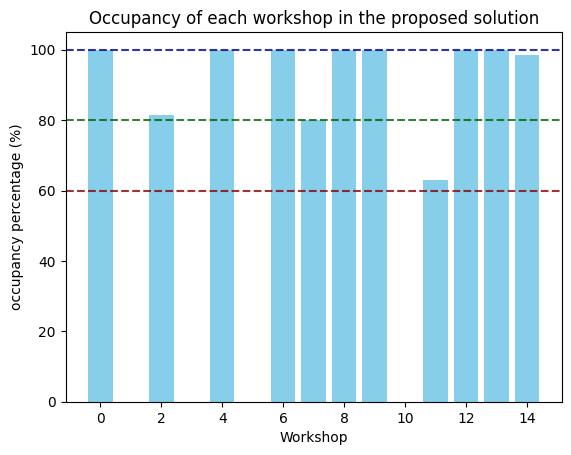

In [32]:
# count how full each workshop is
workshops = []
percentages = []
U_2 = U + U
workshop_actual_capacity = defaultdict(int) # the key is the workshop ID 0, 1, ... and the value is the number of students assigned to that workshop in the solution
for key, value in dic_assignments_made.items():
    for workshop in value:
       workshop_actual_capacity[workshop] += 1 

for workshop, amount in sorted(workshop_actual_capacity.items()):
    percentage = 100 * amount / U_2[workshop]
    workshops.append(workshop)
    percentages.append(percentage)
    print(f"Workshop {workshop} has {amount} students, it is {100 * (amount / U_2[workshop])}% full")

plt.bar(workshops, percentages, color='skyblue')
plt.ylabel('occupancy percentage (%)')
plt.xlabel('Workshop')
plt.title('Occupancy of each workshop in the proposed solution')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(60, color='darkred', linestyle='--', linewidth=1.5, label='60%', alpha=0.8)

## AAL bachelor

In [33]:
# Select program and campus
pref = pref_b_aal

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

# in this case there is no one-day workshop
C = [4, 5]                              # capacity of workshops by time slot (AM, PM)
U = [60 for _ in range(pref.shape[1])]  # capacity of each workshop

print("There are", len(pref), "students; take this into account when choosing the capacity and number of workshops")
print("\n")
pref.head()

There are 231 students; take this into account when choosing the capacity and number of workshops




,Digitale praksisser i projektarbejdet,Etisk teknologivurdering,Facilitering af produktive møder,Generativ AI i studiepraksis,"Motivation, trivsel og work-life balance",Psykologisk tryghed i teams,SCRUM-teknikker i projektarbejdet,Samarbejde på tværs af fagligheder,Systemtænkning i ingeniørvidenskab,Tværfagligt problemdesign
17,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
18,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
35,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,1.0,NaN
36,3.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
47,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN


In [34]:
print(f'Using weights: {p}')

Using weights: [10, 5, 3]


In [35]:
%%time
# 0 at the end so it doesn’t print too much, 1 if I want more info
model_b_AAL, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 7434 rows, 4680 columns and 27840 nonzeros
Model fingerprint: 0x70a872cf
Model has 462 quadratic constraints
Variable types: 0 continuous, 4680 integer (4680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 231 rows and 0 columns
Presolve time: 0.07s
Presolved: 16905 rows, 13920 columns, 60180 nonzeros
Variable types: 0 continuous, 13920 integer (13920 

## Results AAL bachelor

In [36]:
# constraints and variables
print(f"{model_b_AAL.NumConstrs} are linear constraints")
print(f"{model_b_AAL.NumQConstrs} are quadratic constraints")
print(f"{model_b_AAL.NumGenConstrs} are general constraints")
print(f"{model_b_AAL.NumVars} variables")

7434 are linear constraints
462 are quadratic constraints
0 are general constraints
4680 variables


In [37]:
# On average, score per student
model_b_AAL.ObjVal / (len(S) - 1)

13.639130434782608

In [38]:
# Workshops: held or not
util.view_workshops(z)

Workshop 0 will not be held
Workshop 1 will not be held
Workshop 2 was selected to be held
Workshop 3 was selected to be held
Workshop 4 was selected to be held
Workshop 5 will not be held
Workshop 6 will not be held
Workshop 7 was selected to be held
Workshop 8 was selected to be held
Workshop 9 was selected to be held
Workshop 10 will not be held
Workshop 11 was selected to be held
Workshop 12 will not be held
Workshop 13 will not be held
Workshop 14 will not be held
Workshop 15 was selected to be held
Workshop 16 will not be held
Workshop 17 will not be held
Workshop 18 was selected to be held
Workshop 19 will not be held


In [39]:
# To see which version of the workshop is held, since workshops can be offered more than once
util.view_workshops_mod(z, len(T))

Workshop 0.0 will not be held
Workshop 1.0 will not be held
Workshop 2.0 was selected to be held
Workshop 3.0 was selected to be held
Workshop 4.0 was selected to be held
Workshop 5.0 will not be held
Workshop 6.0 will not be held
Workshop 7.0 was selected to be held
Workshop 8.0 was selected to be held
Workshop 9.0 was selected to be held
Workshop 0.1 will not be held
Workshop 1.1 was selected to be held
Workshop 2.1 will not be held
Workshop 3.1 will not be held
Workshop 4.1 will not be held
Workshop 5.1 was selected to be held
Workshop 6.1 will not be held
Workshop 7.1 will not be held
Workshop 8.1 was selected to be held
Workshop 9.1 will not be held


In [40]:
# schedule of each workshop
workshops_AM, workshops_PM = util.workshop_schedules(y)

Workshop 2 is held in the PM time slot
Workshop 3 is held in the PM time slot
Workshop 4 is held in the AM time slot
Workshop 7 is held in the AM time slot
Workshop 8 is held in the PM time slot
Workshop 9 is held in the PM time slot
Workshop 11 is held in the AM time slot
Workshop 15 is held in the PM time slot
Workshop 18 is held in the AM time slot


In [41]:
# Workshops and their time blocks
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i))

Workshops AM
- Workshop 4
- Workshop 7
- Workshop 11
- Workshop 18
Workshops PM
- Workshop 2
- Workshop 3
- Workshop 8
- Workshop 9
- Workshop 15


In [42]:
# Workshops and their time blocks, considering the workshop version
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

Workshops AM
- Workshop 4.0
- Workshop 7.0
- Workshop 1.1
- Workshop 8.1
Workshops PM
- Workshop 2.0
- Workshop 3.0
- Workshop 8.0
- Workshop 9.0
- Workshop 5.1


In [43]:
# Student assignments to workshops
assignments_made_dict = util.view_assignments(w)

Student 0 was assigned to workshop 8
Student 0 was assigned to workshop 11
Student 1 was assigned to workshop 8
Student 1 was assigned to workshop 11
Student 2 was assigned to workshop 4
Student 2 was assigned to workshop 8
Student 3 was assigned to workshop 4
Student 3 was assigned to workshop 15
Student 4 was assigned to workshop 4
Student 4 was assigned to workshop 8
Student 5 was assigned to workshop 4
Student 5 was assigned to workshop 8
Student 6 was assigned to workshop 4
Student 6 was assigned to workshop 8
Student 7 was assigned to workshop 9
Student 7 was assigned to workshop 18
Student 8 was assigned to workshop 3
Student 8 was assigned to workshop 11
Student 9 was assigned to workshop 9
Student 9 was assigned to workshop 18
Student 10 was assigned to workshop 9
Student 10 was assigned to workshop 18
Student 11 was assigned to workshop 7
Student 11 was assigned to workshop 9
Student 12 was assigned to workshop 9
Student 12 was assigned to workshop 11
Student 13 was assigned 

In [ ]:
# This dictionary is important because it indicates the version of the workshop the student was assigned to (v1 or v2, and from that we can determine the schedule)
print(assignments_made_dict) #key: student, value:[assigned_workshops]

{0: [8, 11], 1: [8, 11], 2: [4, 8], 3: [4, 15], 4: [4, 8], 5: [4, 8], 6: [4, 8], 7: [9, 18], 8: [3, 11], 9: [9, 18], 10: [9, 18], 11: [7, 9], 12: [9, 11], 13: [3, 18], 14: [9, 18], 15: [2, 11], 16: [3, 11], 17: [3, 11], 18: [9, 11], 19: [2, 18], 20: [7, 8], 21: [3, 4], 22: [9, 18], 23: [9, 11], 24: [7, 8], 25: [7, 15], 26: [8, 11], 27: [2, 11], 28: [9, 18], 29: [3, 11], 30: [3, 11], 31: [7, 8], 32: [4, 15], 33: [3, 18], 34: [8, 11], 35: [3, 18], 36: [7, 8], 37: [4, 9], 38: [8, 11], 39: [8, 11], 40: [4, 15], 41: [7, 8], 42: [4, 8], 43: [2, 18], 44: [3, 18], 45: [2, 7], 46: [4, 8], 47: [7, 8], 48: [3, 18], 49: [7, 8], 50: [15, 18], 51: [2, 4], 52: [3, 4], 53: [3, 4], 54: [3, 18], 55: [3, 4], 56: [3, 11], 57: [9, 11], 58: [9, 18], 59: [8, 11], 60: [7, 8], 61: [7, 8], 62: [7, 8], 63: [7, 8], 64: [2, 18], 65: [7, 8], 66: [7, 15], 67: [2, 11], 68: [8, 11], 69: [11, 15], 70: [9, 18], 71: [4, 9], 72: [4, 9], 73: [4, 9], 74: [3, 4], 75: [4, 9], 76: [9, 18], 77: [2, 4], 78: [4, 8], 79: [3, 4], 8

In [45]:
# Create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_workshops = len(T)
assignments_made_dict_mod = {k: [x%n_workshops for x in v] for k, v in assignments_made_dict.items()}

In [46]:
# All of them should be equal, i.e., all students were assigned to workshops
print(len(S), len(assignments_made_dict), len(assignments_made_dict_mod))

231 231 231


## Estadistics AAL bachelor

In [48]:
# This one does consider double versions when counting
counter_first_opt = 0               # assigned to 1st choice and the other was not requested
counter_second_opt = 0              # assigned to 2nd choice and the other was not requested
counter_third_opt = 0               # assigned to 3rd choice and the other was not requested
counter_first_second_opt = 0        # assigned to 1st and 2nd choices
counter_second_third_opt = 0        # assigned to 2nd and 3rd choices
counter_first_third_opt = 0         # assigned to 1st and 3rd choices
counter_none = 0                    # was not assigned to any preferred option
counter_first_opt_whole_day = 0     # assigned to 1st choice and it was a one-day workshop
counter_second_opt_whole_day = 0    # assigned to 2nd choice and it was a one-day workshop
counter_third_opt_whole_day = 0     # assigned to 3rd choice and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]):
        counter_first_second_opt += 1  # assigned to 1st and 2nd choices
    elif (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_second_third_opt += 1  # assigned to 2nd and 3rd choices
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_first_third_opt += 1  # assigned to 1st and 3rd choices
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_first_opt += 1  # assigned only to 1st choice, the other workshop was not requested
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_second_opt += 1  # assigned only to 2nd choice, the other workshop was not requested
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_third_opt += 1  # assigned only to 3rd choice, the other workshop was not requested
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_first_opt_whole_day += 1  # assigned to 1st choice and it was a full-day workshop
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_second_opt_whole_day += 1  # assigned to 2nd choice and it was a full-day workshop
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_third_opt_whole_day += 1  # assigned to 3rd choice and it was a full-day workshop
    else:
        counter_none += 1  # not assigned to any preferred workshop
        print(assignments_made_dict_mod[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_second_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_none} in none of the options they chose :(, {100*counter_none/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_none
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

There are 15 only in their first choice, 6.4935064935064934%
There are 7 only in their second choice, 3.0303030303030303%
There are 1 only in their third choice, 0.4329004329004329%
There are 145 in their first and second choices, 62.77056277056277%
There are 9 in their second and third choices, 3.896103896103896%
There are 54 in their first and third choices, 23.376623376623378%
There are 0 in none of the options they chose :(, 0.0%
There are 0 only in their first choice, but this was a full-day workshop, 0.0%
There are 0 only in their second choice, but this was a full-day workshop, 0.0%
There are 0 only in their third choice, but this was a full-day workshop, 0.0%
In total there are: 231 students


In [49]:
first_counter = 0
second_counter = 0
for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]):
        first_counter += 1 # it ended up in top 1
    if (t_pref[s][2] in assignments_made_dict_mod[s]):
        second_counter += 1 # it ended up in top 2
print("In 1st choice", first_counter)
print("In 2nd choice", second_counter)

In 1st choice 214
In 2nd choice 161


In [51]:
# count how many ended up only in what they requested, that is, all the workshops they were assigned to were in their list
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = assignments_made_dict_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
        print(s, prefs_vals, assigned)
    counter += 1
print("\n")
print("Total lucky students:", lucky_counter, lucky_counter / n_students)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request, this is {no_counter / n_students} out of 1")

3 {0, 4, 6} [4, 5]
8 {0, 9, 3} [3, 1]
15 {0, 2, 3} [2, 1]
16 {0, 3, 5} [3, 1]
17 {0, 3, 5} [3, 1]
29 {0, 3, 6} [3, 1]
30 {0, 3, 6} [3, 1]
34 {0, 8, 3} [8, 1]
66 {0, 4, 7} [7, 5]
67 {0, 2, 6} [2, 1]
69 {0, 3, 5} [1, 5]
109 {0, 5, 6} [1, 5]
121 {0, 9, 6} [9, 1]
128 {0, 9, 3} [3, 1]
140 {8, 3, 6} [8, 1]
141 {3, 5, 6} [1, 5]
147 {0, 8, 6} [8, 1]
187 {9, 2, 3} [9, 1]
193 {0, 4, 7} [4, 5]
199 {0, 6, 7} [7, 5]
200 {2, 5, 6} [1, 5]
221 {2, 3, 6} [2, 1]
222 {0, 1, 4} [2, 4]


Total lucky students: 208 0.9004329004329005
There are 23 students who were assigned to at least one workshop they did not request, this is 0.09956709956709957 out of 1


Workshop 2 has 31 students, it is 51.66666666666667% full
Workshop 3 has 60 students, it is 100.0% full
Workshop 4 has 60 students, it is 100.0% full
Workshop 7 has 59 students, it is 98.33333333333333% full
Workshop 8 has 54 students, it is 90.0% full
Workshop 9 has 59 students, it is 98.33333333333333% full
Workshop 11 has 52 students, it is 86.66666666666667% full
Workshop 15 has 27 students, it is 45.0% full
Workshop 18 has 60 students, it is 100.0% full


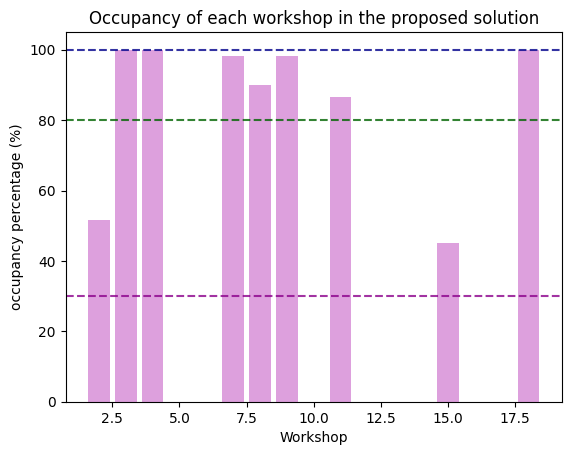

In [52]:
# count how full each workshop is
workshops = []
percentages = []
U_2 = U + U
workshop_actual_capacity = defaultdict(int) # the key is the workshop ID 0, 1, ... and the value is the number of students assigned to that workshop in the solution
for key, value in assignments_made_dict.items():
    for workshop in value:
       workshop_actual_capacity[workshop] += 1 

for workshop, amount in sorted(workshop_actual_capacity.items()):
    percentage = 100 * amount / U_2[workshop]
    workshops.append(workshop)
    percentages.append(percentage)
    print(f"Workshop {workshop} has {amount} students, it is {100 * (amount / U_2[workshop])}% full")

plt.bar(workshops, percentages, color='plum')
plt.ylabel('occupancy percentage (%)')
plt.xlabel('Workshop')
plt.title('Occupancy of each workshop in the proposed solution')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## CPH master

In [53]:
# Select program and campus
pref = pref_m_cph

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

D[1] = 1                                # workshop 1 is a full-day workshop
C = [3, 3]                              # capacity of workshops by time slot (AM, PM)
U = [40 for _ in range(pref.shape[1])]  # capacity of each workshop (all with x seats)

print("There are", len(pref), "students; take this into account when choosing the capacity and number of workshops")

pref.head()

There are 60 students; take this into account when choosing the capacity and number of workshops


,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
45,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
55,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN
63,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN
65,NaN,2.0,NaN,NaN,1.0,3.0,NaN,NaN


In [54]:
#p = [8, 4, 2] # in case I want to modify the default weights [10, 5, 3]
print(f'Using weights: {p}')

Using weights: [10, 5, 3]


In [55]:
%%time
# 0 at the end so it doesn’t print too much, 1 if I want more info
model_m_CPH, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1594 rows, 1008 columns and 5856 nonzeros
Model fingerprint: 0x39fc368c
Model has 120 quadratic constraints
Variable types: 0 continuous, 1008 integer (1008 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 122 rows and 4 columns
Presolve time: 0.04s
Presolved: 3272 rows, 2684 columns, 12330 nonzeros
Variable types: 0 continuous, 2684 integer (2684 binar

## Results CPH master

In [ ]:
# Constraints and variables
print(f"{model_ESB.NumConstrs} are linear constraints")
print(f"{model_ESB.NumQConstrs} are quadratic constraints")
print(f"{model_ESB.NumGenConstrs} are general constraints")
print(f"{model_ESB.NumVars} variables")

1594 son restricciones lineales
120 son restricciones cuadraticas
0 son restricciones generales
1008 variables


In [ ]:
# On average, score per student
model_m_CPH.ObjVal / (len(S) - 1)

12.305084745762711

In [ ]:
# Workshops: held or not
util.view_workshops(z)

Workshop 0 was selected to be held
Workshop 1 will not be held
Workshop 2 will not be held
Workshop 3 will not be held
Workshop 4 will not be held
Workshop 5 was selected to be held
Workshop 6 was selected to be held
Workshop 7 will not be held
Workshop 8 will not be held
Workshop 9 will not be held
Workshop 10 will not be held
Workshop 11 was selected to be held
Workshop 12 was selected to be held
Workshop 13 will not be held
Workshop 14 will not be held
Workshop 15 was selected to be held


In [ ]:
# To see which version of the workshop is held, since workshops can be offered more than once
util.view_workshops_mod(z, len(T))

Workshop 0.0 was selected to be held
Workshop 1.0 will not be held
Workshop 2.0 will not be held
Workshop 3.0 will not be held
Workshop 4.0 will not be held
Workshop 5.0 was selected to be held
Workshop 6.0 was selected to be held
Workshop 7.0 will not be held
Workshop 0.1 will not be held
Workshop 1.1 will not be held
Workshop 2.1 will not be held
Workshop 3.1 was selected to be held
Workshop 4.1 was selected to be held
Workshop 5.1 will not be held
Workshop 6.1 will not be held
Workshop 7.1 was selected to be held


In [ ]:
# Schedule of each workshop
workshops_AM, workshops_PM = util.workshop_schedules(y)

Workshop 0 is held in the PM time slot
Workshop 5 is held in the AM time slot
Workshop 6 is held in the AM time slot
Workshop 11 is held in the AM time slot
Workshop 12 is held in the PM time slot
Workshop 15 is held in the PM time slot


In [ ]:
# Workshops and their time blocks
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i))

Workshops AM
- Workshop 5
- Workshop 6
- Workshop 11
Workshops PM
- Workshop 0
- Workshop 12
- Workshop 15


In [ ]:
# Workshops and their time blocks, considering the workshop version
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

Workshops AM
- Taller 5.0
- Taller 6.0
- Taller 3.1
Talleres PM
- Taller 0.0
- Taller 4.1
- Taller 7.1


In [ ]:
# Student assignments to workshops
assignments_made_dict = util.view_assignments(w)

Student 0 was assigned to workshop 6
Student 0 was assigned to workshop 15
Student 1 was assigned to workshop 0
Student 1 was assigned to workshop 6
Student 2 was assigned to workshop 11
Student 2 was assigned to workshop 12
Student 3 was assigned to workshop 0
Student 3 was assigned to workshop 6
Student 4 was assigned to workshop 5
Student 4 was assigned to workshop 12
Student 5 was assigned to workshop 6
Student 5 was assigned to workshop 15
Student 6 was assigned to workshop 11
Student 6 was assigned to workshop 15
Student 7 was assigned to workshop 5
Student 7 was assigned to workshop 15
Student 8 was assigned to workshop 0
Student 8 was assigned to workshop 6
Student 9 was assigned to workshop 5
Student 9 was assigned to workshop 12
Student 10 was assigned to workshop 0
Student 10 was assigned to workshop 11
Student 11 was assigned to workshop 6
Student 11 was assigned to workshop 12
Student 12 was assigned to workshop 0
Student 12 was assigned to workshop 5
Student 13 was assign

In [ ]:
# this dictionary is important because it indicates the version of the workshop the student was assigned to (v1 or v2, and from that we can determine the schedule)
print(assignments_made_dict)  # key: student, value: [assigned workshops]

{0: [6, 15], 1: [0, 6], 2: [11, 12], 3: [0, 6], 4: [5, 12], 5: [6, 15], 6: [11, 15], 7: [5, 15], 8: [0, 6], 9: [5, 12], 10: [0, 11], 11: [6, 12], 12: [0, 5], 13: [5, 12], 14: [5, 12], 15: [6, 12], 16: [0, 5], 17: [11, 12], 18: [5, 12], 19: [6, 12], 20: [0, 6], 21: [6, 12], 22: [0, 11], 23: [0, 11], 24: [0, 11], 25: [5, 12], 26: [0, 6], 27: [11, 12], 28: [0, 6], 29: [0, 5], 30: [0, 11], 31: [0, 6], 32: [6, 12], 33: [6, 12], 34: [6, 12], 35: [6, 12], 36: [6, 12], 37: [0, 5], 38: [11, 12], 39: [11, 15], 40: [0, 6], 41: [0, 11], 42: [0, 11], 43: [0, 6], 44: [0, 6], 45: [11, 12], 46: [0, 5], 47: [0, 6], 48: [6, 15], 49: [0, 5], 50: [0, 11], 51: [0, 5], 52: [5, 12], 53: [5, 12], 54: [5, 12], 55: [6, 12], 56: [6, 12], 57: [0, 6], 58: [0, 6], 59: [5, 12]}


In [ ]:
# Create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_workshops = len(T)
assignments_made_dict_mod = {k: [x%n_workshops for x in v] for k, v in assignments_made_dict.items()}

In [ ]:
# All of them should be equal, i.e., all students were assigned to workshops
print(len(S), len(assignments_made_dict), len(assignments_made_dict_mod))

60 60 60


## Estadistics CPH master

In [67]:
# This one does consider double versions when counting
counter_first_opt = 0               # assigned to 1st choice and the other was not requested
counter_second_opt = 0              # assigned to 2nd choice and the other was not requested
counter_third_opt = 0               # assigned to 3rd choice and the other was not requested
counter_first_second_opt = 0        # assigned to 1st and 2nd choices
counter_second_third_opt = 0        # assigned to 2nd and 3rd choices
counter_first_third_opt = 0         # assigned to 1st and 3rd choices
counter_none = 0                    # was not assigned to any preferred option
counter_first_opt_whole_day = 0     # assigned to 1st choice and it was a one-day workshop
counter_second_opt_whole_day = 0    # assigned to 2nd choice and it was a one-day workshop
counter_third_opt_whole_day = 0     # assigned to 3rd choice and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]):
        counter_first_second_opt += 1  # ended up in top 1 and top 2
    elif (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_second_third_opt += 1  # ended up in top 2 and top 3
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_first_third_opt += 1   # ended up in top 1 and top 3
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_first_opt += 1         # ended up in top 1 and didn't want the other
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_second_opt += 1        # ended up in top 2 and didn't want the other
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_third_opt += 1         # ended up in top 3 and didn't want the other
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_first_opt_whole_day += 1   # ended up in top 1 and it was all day
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_second_opt_whole_day += 1  # ended up in top 2 and it was all day
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_third_opt_whole_day += 1   # ended up in top 3 and it was all day
    else:
        counter_none += 1  # did not end up in any they wanted
        print(assignments_made_dict_mod[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_second_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_none} in none of the options they chose :(, {100*counter_none/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_none
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

There are 6 only in their first choice, 10.0%
There are 6 only in their second choice, 10.0%
There are 0 only in their third choice, 0.0%
There are 26 in their first and second choices, 43.333333333333336%
There are 8 in their second and third choices, 13.333333333333334%
There are 14 in their first and third choices, 23.333333333333332%
There are 0 in none of the options they chose :(, 0.0%
There are 0 only in their first choice, but this was a full-day workshop, 0.0%
There are 0 only in their second choice, but this was a full-day workshop, 0.0%
There are 0 only in their third choice, but this was a full-day workshop, 0.0%
In total there are: 60 students


In [68]:
first_counter = 0
second_counter = 0
first = []
second = []
for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]):
        first_counter += 1 # it ended up in top 1
        first.append(s)
    if (t_pref[s][2] in assignments_made_dict_mod[s]):
        second_counter += 1 # it ended up in top 2
        second.append(s)
print("In 1st choice", first_counter, first_counter / n_students * 100)
print("In 2nd choice", second_counter, second_counter / n_students * 100)

In 1st choice 46 76.66666666666667
In 2nd choice 40 66.66666666666666


In [69]:
for i in range(60):
    if i not in first:
        print(i)

13
26
29
34
37
39
41
42
45
48
50
52
53
54


In [70]:
for i in range(60):
    if i not in second:
        print(i)

2
3
4
7
8
9
10
11
15
16
17
18
28
30
38
49
51
56
57
59


In [71]:
# count how many students were assigned only to workshops they requested, i.e., all workshops they were assigned to were in their preference list
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = assignments_made_dict_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    # all assigned workshops are among the preferred values
    if all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
    counter += 1
print("\n")
print("Total lucky students:", lucky_counter, lucky_counter / n_students)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request; this is {no_counter / n_students} out of 1")



Total lucky students: 48 0.8
There are 12 students who were assigned to at least one workshop they did not request; this is 0.2 out of 1


Workshop 0 has 28 students, it is 70.0% full
Workshop 5 has 18 students, it is 45.0% full
Workshop 6 has 27 students, it is 67.5% full
Workshop 11 has 15 students, it is 37.5% full
Workshop 12 has 26 students, it is 65.0% full
Workshop 15 has 6 students, it is 15.0% full


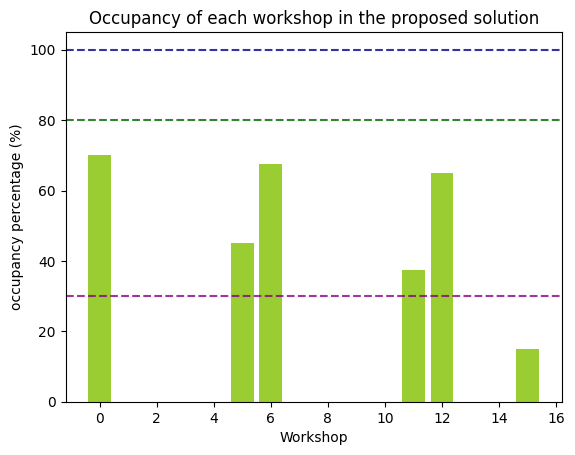

In [72]:
# count how full each workshop is
workshops = []
percentages = []
U_2 = U + U
workshop_actual_capacity = defaultdict(int) # the key is the workshop ID 0, 1, ... and the value is the number of students assigned to that workshop in the solution
for key, value in assignments_made_dict.items():
    for workshop in value:
       workshop_actual_capacity[workshop] += 1 

for workshop, amount in sorted(workshop_actual_capacity.items()):
    percentage = 100 * amount / U_2[workshop]
    workshops.append(workshop)
    percentages.append(percentage)
    print(f"Workshop {workshop} has {amount} students, it is {100 * (amount / U_2[workshop])}% full")

plt.bar(workshops, percentages, color='yellowgreen')
plt.ylabel('occupancy percentage (%)')
plt.xlabel('Workshop')
plt.title('Occupancy of each workshop in the proposed solution')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## CPH bachelor

In [73]:
# Select program and campus
pref = pref_b_cph

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

# in this case there is no one-day workshop
C = [2, 3]                              # capacity of workshops by time slot (AM, PM)
U = [50 for _ in range(pref.shape[1])]  # capacity of each workshop

print("There are", len(pref), "students, take this into account when choosing the capacity and number of workshops")
print("\n")
pref.head()

There are 57 students, take this into account when choosing the capacity and number of workshops




,Digitale praksisser i projektarbejdet,Etisk teknologivurdering,Facilitering af produktive møder,Generativ AI i studiepraksis,"Motivation, trivsel og work-life balance",Psykologisk tryghed i teams,SCRUM-teknikker i projektarbejdet,Samarbejde på tværs af fagligheder,Systemtænkning i ingeniørvidenskab,Tværfagligt problemdesign
69,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
70,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
71,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
76,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0
113,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN


In [74]:
#p = [16, 15, 2]
print(f'Using weights: {p}')

Using weights: [10, 5, 3]


In [75]:
%%time
# 0 at the end so it doesn’t print too much, 1 if I want more info
model_b_CPH, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1866 rows, 1200 columns and 6960 nonzeros
Model fingerprint: 0x7deda033
Model has 114 quadratic constraints
Variable types: 0 continuous, 1200 integer (1200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 57 rows and 0 columns
Presolve time: 0.04s
Presolved: 4203 rows, 3480 columns, 14940 nonzeros
Variable types: 0 continuous, 3480 integer (3480 binary

## Results CPH bachelor

In [76]:
# Constraints and variables
print(f"{model_b_CPH.NumConstrs} are linear constraints")
print(f"{model_b_CPH.NumQConstrs} are quadratic constraints")
print(f"{model_b_CPH.NumGenConstrs} are general constraints")
print(f"{model_b_CPH.NumVars} variables")

1866 are linear constraints
114 are quadratic constraints
0 are general constraints
1200 variables


In [77]:
# On average, score per student
model_b_CPH.ObjVal / (len(S) - 1)

11.017857142857142

In [78]:
# Workshops: held or not
util.view_workshops(z)

Workshop 0 will not be held
Workshop 1 will not be held
Workshop 2 will not be held
Workshop 3 will not be held
Workshop 4 will not be held
Workshop 5 will not be held
Workshop 6 was selected to be held
Workshop 7 will not be held
Workshop 8 was selected to be held
Workshop 9 will not be held
Workshop 10 will not be held
Workshop 11 will not be held
Workshop 12 was selected to be held
Workshop 13 was selected to be held
Workshop 14 will not be held
Workshop 15 was selected to be held
Workshop 16 will not be held
Workshop 17 will not be held
Workshop 18 will not be held
Workshop 19 will not be held


In [79]:
# To see which version of the workshop is held, since workshops can be offered more than once
util.view_workshops_mod(z, len(T))

Workshop 0.0 will not be held
Workshop 1.0 will not be held
Workshop 2.0 will not be held
Workshop 3.0 will not be held
Workshop 4.0 will not be held
Workshop 5.0 will not be held
Workshop 6.0 was selected to be held
Workshop 7.0 will not be held
Workshop 8.0 was selected to be held
Workshop 9.0 will not be held
Workshop 0.1 will not be held
Workshop 1.1 will not be held
Workshop 2.1 was selected to be held
Workshop 3.1 was selected to be held
Workshop 4.1 will not be held
Workshop 5.1 was selected to be held
Workshop 6.1 will not be held
Workshop 7.1 will not be held
Workshop 8.1 will not be held
Workshop 9.1 will not be held


In [80]:
# Schedule of each workshop
workshops_AM, workshops_PM = util.workshop_schedules(y)

Workshop 6 is held in the PM time slot
Workshop 8 is held in the AM time slot
Workshop 12 is held in the AM time slot
Workshop 13 is held in the PM time slot
Workshop 15 is held in the PM time slot


In [81]:
# Workshops and their time blocks
print("AM workshops")
for i in workshops_AM:
    print("- Workshop " + str(i))

print("PM workshops")
for i in workshops_PM:
    print("- Workshop " + str(i))

AM workshops
- Workshop 8
- Workshop 12
PM workshops
- Workshop 6
- Workshop 13
- Workshop 15


In [82]:
# Workshops and their time blocks, considering the workshop version
print("AM workshops")
for i in workshops_AM:
    print("- Workshop " + str(i % len(T)) + "." + str(i // len(T)))

print("PM workshops")
for i in workshops_PM:
    print("- Workshop " + str(i % len(T)) + "." + str(i // len(T)))

AM workshops
- Workshop 8.0
- Workshop 2.1
PM workshops
- Workshop 6.0
- Workshop 3.1
- Workshop 5.1


In [83]:
# Student assignments to workshops
assignments_made_dict = util.view_assignments(w)

Student 0 was assigned to workshop 6
Student 0 was assigned to workshop 8
Student 1 was assigned to workshop 6
Student 1 was assigned to workshop 8
Student 2 was assigned to workshop 6
Student 2 was assigned to workshop 8
Student 3 was assigned to workshop 6
Student 3 was assigned to workshop 8
Student 4 was assigned to workshop 6
Student 4 was assigned to workshop 8
Student 5 was assigned to workshop 12
Student 5 was assigned to workshop 13
Student 6 was assigned to workshop 8
Student 6 was assigned to workshop 13
Student 7 was assigned to workshop 12
Student 7 was assigned to workshop 13
Student 8 was assigned to workshop 8
Student 8 was assigned to workshop 13
Student 9 was assigned to workshop 12
Student 9 was assigned to workshop 15
Student 10 was assigned to workshop 6
Student 10 was assigned to workshop 8
Student 11 was assigned to workshop 8
Student 11 was assigned to workshop 13
Student 12 was assigned to workshop 6
Student 12 was assigned to workshop 8
Student 13 was assigned

In [84]:
# Create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_workshops = len(T)
assignments_made_dict_mod = {k: [x%n_workshops for x in v] for k, v in assignments_made_dict.items()}

In [85]:
# All of them should be equal, i.e., all students were assigned to workshops
print(len(S), len(assignments_made_dict), len(assignments_made_dict_mod))

57 57 57


## Estadistics CPH bachelor

In [86]:
# this one does consider double versions when counting
counter_first_opt = 0               # assigned to 1st choice and the other was not requested
counter_second_opt = 0              # assigned to 2nd choice and the other was not requested
counter_third_opt = 0               # assigned to 3rd choice and the other was not requested
counter_first_second_opt = 0        # assigned to 1st and 2nd choices
counter_second_third_opt = 0        # assigned to 2nd and 3rd choices
counter_first_third_opt = 0         # assigned to 1st and 3rd choices
counter_none = 0                    # was not assigned to any preferred option
counter_first_opt_whole_day = 0     # assigned to 1st choice and it was a one-day workshop
counter_second_opt_whole_day = 0    # assigned to 2nd choice and it was a one-day workshop
counter_third_opt_whole_day = 0     # assigned to 3rd choice and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]):
        counter_first_second_opt += 1  # assigned to 1st and 2nd choices
    elif (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_second_third_opt += 1  # assigned to 2nd and 3rd choices
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_first_third_opt += 1  # assigned to 1st and 3rd choices
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_first_opt += 1  # assigned to 1st choice and the other was not requested
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_second_opt += 1  # assigned to 2nd choice and the other was not requested
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_third_opt += 1  # assigned only to 3rd choice, the other workshop was not requested
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_first_opt_whole_day += 1  # assigned to 1st choice and it was a full-day workshop
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_second_opt_whole_day += 1  # assigned to 2nd choice and it was a full-day workshop
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_third_opt_whole_day += 1  # assigned to 3rd choice and it was a full-day workshop
    else:
        counter_none += 1  # was not assigned to any preferred workshop
        print(assignments_made_dict_mod[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_second_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_none} in none of the options they chose :(, {100*counter_none/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_none
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

There are 14 only in their first choice, 24.56140350877193%
There are 8 only in their second choice, 14.035087719298245%
There are 4 only in their third choice, 7.017543859649122%
There are 16 in their first and second choices, 28.07017543859649%
There are 2 in their second and third choices, 3.508771929824561%
There are 13 in their first and third choices, 22.80701754385965%
There are 0 in none of the options they chose :(, 0.0%
There are 0 only in their first choice, but this was a full-day workshop, 0.0%
There are 0 only in their second choice, but this was a full-day workshop, 0.0%
There are 0 only in their third choice, but this was a full-day workshop, 0.0%
In total there are: 57 students


In [87]:
first_counter = 0
second_counter = 0
for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]):
        first_counter += 1 # it ended up in top 1
    if (t_pref[s][2] in assignments_made_dict_mod[s]):
        second_counter += 1 # it ended up in top 2
print("In 1st choice", first_counter / n_students)
print("In 2nd choice", second_counter / n_students)

In 1st choice 0.7543859649122807
In 2nd choice 0.45614035087719296


In [88]:
# count how many ended up only in what they requested, that is, all the workshops they were assigned to were in their list
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = assignments_made_dict_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    # all assigned workshops are among the preferred values
    if all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
        print(s, prefs_vals, assigned)
    counter += 1
print("\n")
print("Total lucky students:", lucky_counter, lucky_counter / n_students)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request; this is {no_counter / n_students} out of 1")

3 {8, 9, 2} [6, 8]
5 {0, 3, 4} [2, 3]
7 {8, 9, 2} [2, 3]
9 {0, 4, 5} [2, 5]
10 {8, 9, 7} [6, 8]
11 {8, 9, 7} [8, 3]
13 {0, 3, 5} [2, 5]
14 {0, 4, 5} [2, 5]
17 {8, 1, 2} [6, 8]
20 {8, 4, 7} [8, 3]
24 {9, 5, 7} [8, 5]
25 {9, 5, 7} [8, 5]
26 {9, 5, 7} [8, 5]
29 {1, 2, 4} [6, 2]
30 {1, 2, 7} [2, 5]
31 {9, 3, 4} [8, 3]
32 {8, 2, 4} [6, 8]
33 {9, 3, 7} [2, 3]
36 {1, 2, 9} [2, 5]
37 {8, 1, 2} [6, 8]
42 {8, 9, 0} [8, 5]
43 {8, 1, 2} [6, 2]
44 {8, 1, 2} [6, 2]
47 {8, 9, 7} [6, 8]
49 {0, 3, 6} [8, 3]
54 {0, 9, 5} [2, 5]


Total lucky students: 31 0.543859649122807
There are 26 students who were assigned to at least one workshop they did not request; this is 0.45614035087719296 out of 1


In [ ]:
# count how full each workshop is
workshops = []
percentages = []
U_2 = U + U
workshop_actual_capacity = defaultdict(int) # the key is the workshop ID 0, 1, ... and the value is the number of students assigned to that workshop in the solution
for key, value in assignments_made_dict.items():
    for workshop in value:
       workshop_actual_capacity[workshop] += 1 

for workshop, amount in sorted(workshop_actual_capacity.items()):
    percentage = 100 * amount / U_2[workshop]
    workshops.append(workshop)
    percentages.append(percentage)
    print(f"Workshop {workshop} has {amount} students, it is {100*(amount/U_2[workshop])}% full")

plt.bar(workshops, percentages, color='deepskyblue')
plt.ylabel('occupancy percentage (%)')
plt.xlabel('Workshop')
plt.title('Occupancy of each workshop in the proposed solution')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## ESB

In [89]:
# Select program and campus
pref = pref_esb

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

# in this case there is no one-day workshop
C = [2, 2]                              # capacity of workshops by time slot (AM, PM)
U = [50 for _ in range(pref.shape[1])]  # capacity of each workshop

print("There are", len(pref), "students; take this into account when choosing the capacity and number of workshops")
print("\n")
pref.head()

There are 33 students; take this into account when choosing the capacity and number of workshops




,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
11,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
16,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0


In [90]:
print(f'Using weights: {p}')

Using weights: [10, 5, 3]


In [91]:
%%time
# 0 at the end so it doesn’t print too much, 1 if I want more info
model_ESB, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1819 rows, 1224 columns and 6936 nonzeros
Model fingerprint: 0xccd0e817
Model has 66 quadratic constraints
Variable types: 0 continuous, 1224 integer (1224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 67 rows and 0 columns
Presolve time: 0.02s
Presolved: 4062 rows, 3468 columns, 13634 nonzeros
Variable types: 0 continuous, 3468 integer (3468 binary)

## Results ESB

In [92]:
# Constraints and variables
print(f"{model_ESB.NumConstrs} are linear constraints")
print(f"{model_ESB.NumQConstrs} are quadratic constraints")
print(f"{model_ESB.NumGenConstrs} are general constraints")
print(f"{model_ESB.NumVars} variables")

1819 are linear constraints
66 are quadratic constraints
0 are general constraints
1224 variables


In [93]:
# On average, score per student
model_ESB.ObjVal / (len(S) - 1)

7.375

In [94]:
# Workshops: held or not
util.view_workshops(z)

Workshop 0 was selected to be held
Workshop 1 will not be held
Workshop 2 will not be held
Workshop 3 will not be held
Workshop 4 will not be held
Workshop 5 will not be held
Workshop 6 will not be held
Workshop 7 was selected to be held
Workshop 8 will not be held
Workshop 9 was selected to be held
Workshop 10 will not be held
Workshop 11 will not be held
Workshop 12 will not be held
Workshop 13 will not be held
Workshop 14 will not be held
Workshop 15 will not be held
Workshop 16 was selected to be held
Workshop 17 will not be held
Workshop 18 will not be held
Workshop 19 will not be held
Workshop 20 will not be held
Workshop 21 will not be held
Workshop 22 will not be held
Workshop 23 will not be held
Workshop 24 will not be held
Workshop 25 will not be held
Workshop 26 will not be held
Workshop 27 will not be held
Workshop 28 will not be held
Workshop 29 will not be held
Workshop 30 will not be held
Workshop 31 will not be held
Workshop 32 will not be held
Workshop 33 will not be h

In [95]:
# To see which version of the workshop is held, since workshops can be offered more than once
util.view_workshops_mod(z, len(T))

Workshop 0.0 was selected to be held
Workshop 1.0 will not be held
Workshop 2.0 will not be held
Workshop 3.0 will not be held
Workshop 4.0 will not be held
Workshop 5.0 will not be held
Workshop 6.0 will not be held
Workshop 7.0 was selected to be held
Workshop 8.0 will not be held
Workshop 9.0 was selected to be held
Workshop 10.0 will not be held
Workshop 11.0 will not be held
Workshop 12.0 will not be held
Workshop 13.0 will not be held
Workshop 14.0 will not be held
Workshop 15.0 will not be held
Workshop 16.0 was selected to be held
Workshop 0.1 will not be held
Workshop 1.1 will not be held
Workshop 2.1 will not be held
Workshop 3.1 will not be held
Workshop 4.1 will not be held
Workshop 5.1 will not be held
Workshop 6.1 will not be held
Workshop 7.1 will not be held
Workshop 8.1 will not be held
Workshop 9.1 will not be held
Workshop 10.1 will not be held
Workshop 11.1 will not be held
Workshop 12.1 will not be held
Workshop 13.1 will not be held
Workshop 14.1 will not be held


In [96]:
# Schedule of each workshop
workshops_AM, workshops_PM = util.workshop_schedules(y)

Workshop 0 is held in the PM time slot
Workshop 7 is held in the AM time slot
Workshop 9 is held in the AM time slot
Workshop 16 is held in the PM time slot


In [97]:
# Workshops and their time blocks
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i))

Workshops AM
- Workshop 7
- Workshop 9
Workshops PM
- Workshop 0
- Workshop 16


In [98]:
# Workshops and their time blocks, considering the workshop version
print("Workshops AM")
for i in workshops_AM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Workshops PM")
for i in workshops_PM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

Workshops AM
- Workshop 7.0
- Workshop 9.0
Workshops PM
- Workshop 0.0
- Workshop 16.0


In [99]:
#Asignaciones de estudiantes a los talleres
assignments_made_dict = util.view_assignments(w)

Student 0 was assigned to workshop 0
Student 0 was assigned to workshop 9
Student 1 was assigned to workshop 7
Student 1 was assigned to workshop 16
Student 2 was assigned to workshop 0
Student 2 was assigned to workshop 9
Student 3 was assigned to workshop 0
Student 3 was assigned to workshop 9
Student 4 was assigned to workshop 7
Student 4 was assigned to workshop 16
Student 5 was assigned to workshop 7
Student 5 was assigned to workshop 16
Student 6 was assigned to workshop 7
Student 6 was assigned to workshop 16
Student 7 was assigned to workshop 0
Student 7 was assigned to workshop 9
Student 8 was assigned to workshop 0
Student 8 was assigned to workshop 9
Student 9 was assigned to workshop 0
Student 9 was assigned to workshop 7
Student 10 was assigned to workshop 0
Student 10 was assigned to workshop 9
Student 11 was assigned to workshop 0
Student 11 was assigned to workshop 9
Student 12 was assigned to workshop 9
Student 12 was assigned to workshop 16
Student 13 was assigned to 

In [100]:
# Create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_workshops = len(T)
assignments_made_dict_mod = {k: [x%n_workshops for x in v] for k, v in assignments_made_dict.items()}

In [101]:
# All of them should be equal, i.e., all students were assigned to workshops
print(len(S), len(assignments_made_dict), len(assignments_made_dict_mod))

33 33 33


## Estadistics ESB

In [102]:
# This one does consider double versions when counting
counter_first_opt = 0               # assigned to 1st choice and the other was not requested
counter_second_opt = 0              # assigned to 2nd choice and the other was not requested
counter_third_opt = 0               # assigned to 3rd choice and the other was not requested
counter_first_second_opt = 0        # assigned to 1st and 2nd choices
counter_second_third_opt = 0        # assigned to 2nd and 3rd choices
counter_first_third_opt = 0         # assigned to 1st and 3rd choices
counter_none = 0                    # was not assigned to any preferred option
counter_first_opt_whole_day = 0     # assigned to 1st choice and it was a one-day workshop
counter_second_opt_whole_day = 0    # assigned to 2nd choice and it was a one-day workshop
counter_third_opt_whole_day = 0     # assigned to 3rd choice and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]):
        counter_first_second_opt += 1  # ended up in top 1 and top 2
    elif (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_second_third_opt += 1  # ended up in top 2 and top 3
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]):
        counter_first_third_opt += 1   # ended up in top 1 and top 3
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_first_opt += 1         # ended up in top 1 and didn't want the other
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_second_opt += 1        # ended up in top 2 and didn't want the other
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) != 1):
        counter_third_opt += 1         # ended up in top 3 and didn't want the other
    elif (t_pref[s][1] in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_first_opt_whole_day += 1   # ended up in top 1 and it was all day
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] in assignments_made_dict_mod[s]) and (t_pref[s][3] not in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_second_opt_whole_day += 1  # ended up in top 2 and it was all day
    elif (t_pref[s][1] not in assignments_made_dict_mod[s]) and (t_pref[s][2] not in assignments_made_dict_mod[s]) and (t_pref[s][3] in assignments_made_dict_mod[s]) and (len(assignments_made_dict_mod[s]) == 1):
        counter_third_opt_whole_day += 1   # ended up in top 3 and it was all day
    else:
        counter_none += 1  # did not end up in any they wanted
        print(assignments_made_dict[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_second_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_none} in none of the options they chose :(, {100*counter_none/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_none
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

[0, 7]
{1: 6, 2: 14, 3: 1}
[0, 7]
{1: 10, 2: 5, 3: 1}
There are 8 only in their first choice, 24.242424242424242%
There are 9 only in their second choice, 27.272727272727273%
There are 5 only in their third choice, 15.151515151515152%
There are 2 in their first and second choices, 6.0606060606060606%
There are 5 in their second and third choices, 15.151515151515152%
There are 2 in their first and third choices, 6.0606060606060606%
There are 2 in none of the options they chose :(, 6.0606060606060606%
There are 0 only in their first choice, but this was a full-day workshop, 0.0%
There are 0 only in their second choice, but this was a full-day workshop, 0.0%
There are 0 only in their third choice, but this was a full-day workshop, 0.0%
In total there are: 33 students


In [103]:
first_counter = 0
second_counter = 0
for s in range(len(S)):
    if (t_pref[s][1] in assignments_made_dict_mod[s]):
        first_counter += 1  # assigned to 1st choice
    if (t_pref[s][2] in assignments_made_dict_mod[s]):
        second_counter += 1  # assigned to 2nd choice
print("In 1st choice", first_counter/n_students)
print("In 2nd choice", second_counter/n_students)

In 1st choice 0.36363636363636365
In 2nd choice 0.48484848484848486


In [104]:
# Count how many ended up only in what they requested, that is, all the workshops they were assigned to were in their list
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = assignments_made_dict_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    # all assigned workshops are among the preferred values
    if all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
        print(s, prefs_vals, assigned)
    counter += 1
print("\n")
print("Total lucky students:", lucky_counter, lucky_counter/n_students)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request; this is {no_counter/n_students} out of 1")

0 {9, 3, 13} [0, 9]
1 {16, 5, 14} [7, 16]
2 {9, 11, 13} [0, 9]
3 {0, 2, 12} [0, 9]
5 {16, 1, 8} [7, 16]
7 {0, 11, 5} [0, 9]
9 {1, 6, 14} [0, 7]
10 {9, 11, 12} [0, 9]
11 {0, 2, 3} [0, 9]
12 {16, 8, 4} [9, 16]
13 {16, 10, 6} [9, 16]
16 {16, 6, 15} [9, 16]
18 {0, 3, 12} [0, 9]
19 {8, 6, 7} [7, 16]
20 {0, 12, 13} [0, 7]
21 {0, 11, 13} [0, 9]
24 {8, 16, 1} [7, 16]
26 {8, 16, 5} [7, 16]
27 {16, 10, 14} [7, 16]
28 {0, 12, 13} [0, 9]
29 {16, 1, 10} [7, 16]
30 {11, 9, 3} [0, 9]
31 {16, 8, 6} [7, 16]
32 {1, 10, 5} [0, 7]


Total lucky students: 9 0.2727272727272727
There are 24 students who were assigned to at least one workshop they did not request; this is 0.7272727272727273 out of 1


In [ ]:
#contar cuanto se llenó cada taller
workshops = []
percentages = []
U_2 = U + U
workshop_actual_capacity = defaultdict(int) # the key is the workshop ID 0, 1, ... and the value is the number of students assigned to that workshop in the solution
for key, value in assignments_made_dict.items():
    for workshop in value:
       workshop_actual_capacity[workshop] += 1 

for workshop, amount in sorted(workshop_actual_capacity.items()):
    percentage = 100 * amount / U_2[workshop]
    workshops.append(workshop)
    percentages.append(percentage)
    print(f"Workshop {workshop} has {amount} students, it is {100*(amount/U_2[workshop])}% full")

plt.bar(workshops, percentages, color='orange')
plt.ylabel('occupancy percentage (%)')
plt.xlabel('Workshop')
plt.title('Occupancy of each workshop in the proposed solution')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='30%', alpha=0.8)

## Extra things that might be useful

In [105]:
# If it is infeasible, see the reason
"""
if model.status == GRB.INFEASIBLE:
    print("Model is infeasible. Searching for IIS...")
    
    # Compute IIS
    model.computeIIS()
    
    # Show constraints and variables in conflict
    print("\nConstraints in conflict:")
    for c in model.getConstrs():
        if c.IISConstr:
            print(c.ConstrName)
    
    print("\nVariables involved in conflict:")
    for v in model.getVars():
        if v.IISLB or v.IISUB:
            print(v.VarName)
"""

'\nif model.status == GRB.INFEASIBLE:\n    print("Model is infeasible. Searching for IIS...")\n\n    # Compute IIS\n    model.computeIIS()\n\n    # Show constraints and variables in conflict\n    print("\nConstraints in conflict:")\n    for c in model.getConstrs():\n        if c.IISConstr:\n            print(c.ConstrName)\n\n    print("\nVariables involved in conflict:")\n    for v in model.getVars():\n        if v.IISLB or v.IISUB:\n            print(v.VarName)\n'

In [106]:
# To check
for key, value in assignments_made_dict.items():
    if len(value) != 2:
        print(f"Student {key} was assigned workshop(s) {value}, check whether it is a full-day workshop or an error")

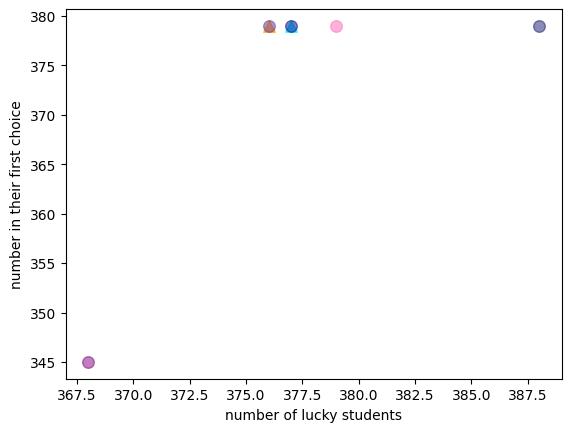

In [107]:
### compare weight results
weights_1 = [388, 379, 257] #10, 5, 3
weights_2 = [377, 379, 268] #3, 2, 1
weights_3 = [376, 379, 269] #10.000, 100, 1
weights_4 = [376, 379, 269] #100, 10, 1 
weights_5 = [377, 379, 268] #10, 2, 1
weights_6 = [368, 345, 320] #16, 15, 5
weights_7 = [379, 379, 266] #8, 4, 2

fig, ax = plt.subplots()
ax.scatter(weights_1[0], weights_1[1], marker='o', c='midnightblue', alpha=0.5, s=70)
ax.scatter(weights_2[0], weights_2[1], marker='^', c='cyan', alpha=0.7, s=70)
ax.scatter(weights_3[0], weights_3[1], marker='^', c='orange', alpha=0.7, s=70)
ax.scatter(weights_4[0], weights_4[1], marker='o', c='rebeccapurple', alpha=0.5, s=70)
ax.scatter(weights_5[0], weights_5[1], marker='o', c='darkblue', alpha=0.5, s=70)
ax.scatter(weights_6[0], weights_6[1], marker='o', c='purple', alpha=0.5, s=70)
ax.scatter(weights_7[0], weights_7[1], marker='o', c='hotpink', alpha=0.5, s=70)

ax.set_xlabel('number of lucky students')
ax.set_ylabel('number in their first choice')

plt.show()
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

In [108]:
# Check that it is correct
sum_AM = 0
sum_PM = 0
for workshop in workshops_AM:
    sum_AM += workshop_actual_capacity[workshop]
for workshop in workshops_PM:
    sum_PM += workshop_actual_capacity[workshop]
print(sum_AM)
print(sum_PM)

0
28


### View some workshop assignments vs what you chose

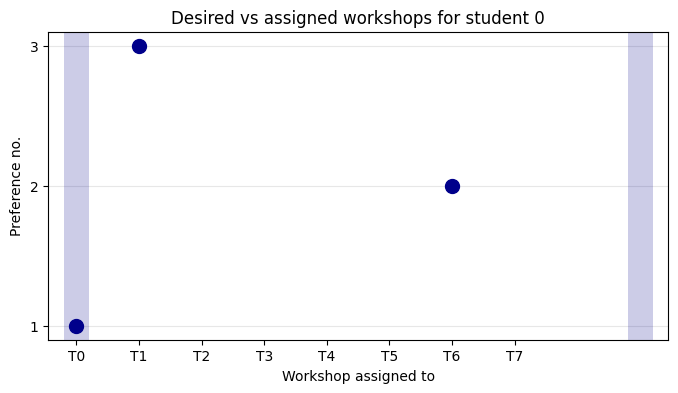

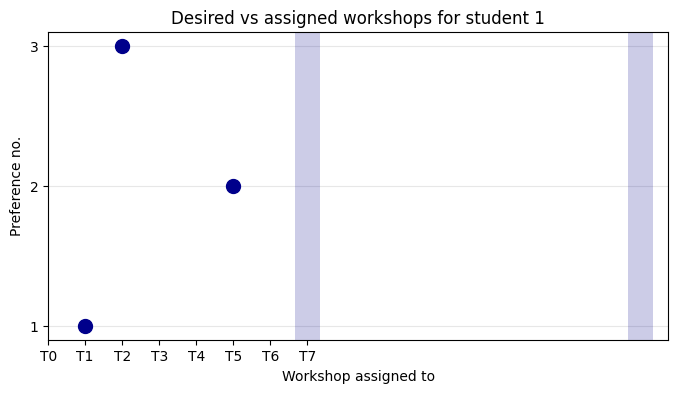

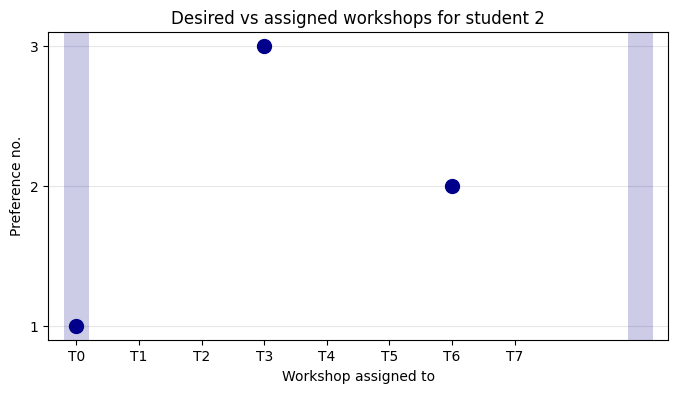

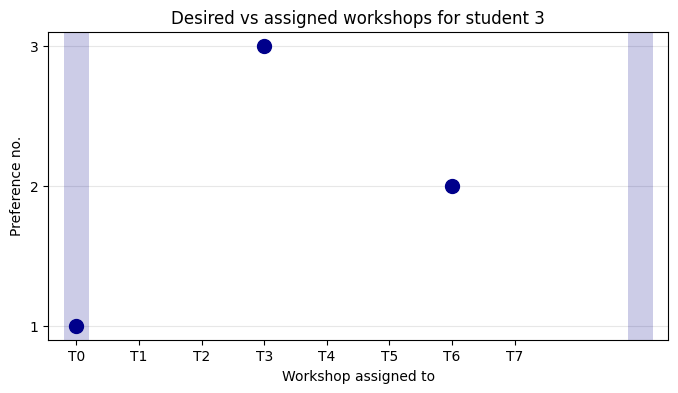

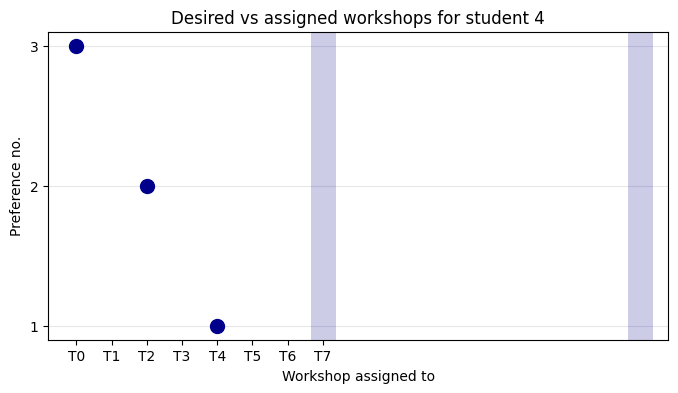

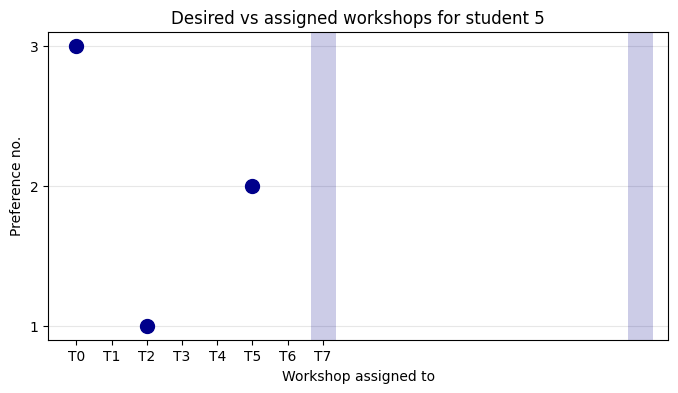

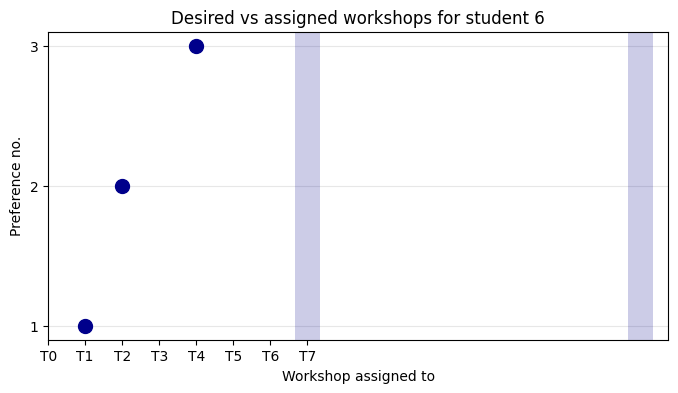

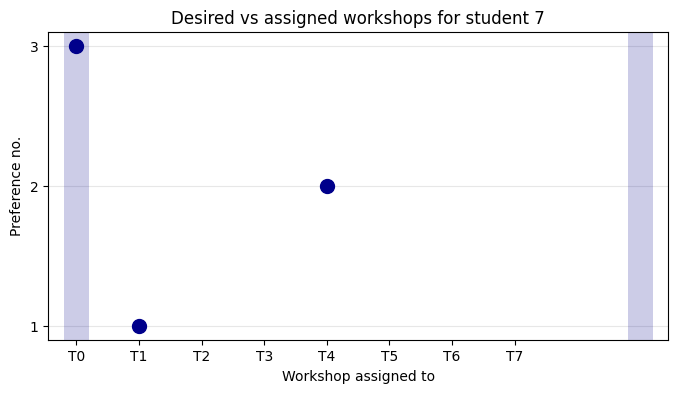

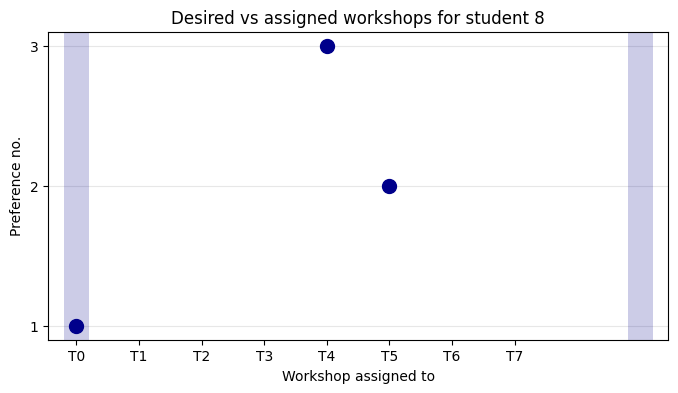

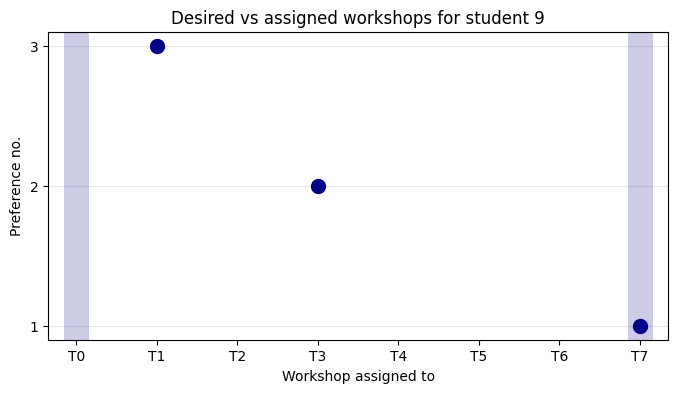

In [109]:
# Visualize the assignment of workshops
workshops = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
# for students 0 to 9, show the workshops they wanted and those they were assigned to
for i in range(10):
    n_student = i
    preferences = util.get_dict(pref_m_aal, n_student) # preference, workshop
    assigned = assignments_made_dict_mod[i] # assignments that they were given, in mod
    
    plt.figure(figsize=(8, 4))
    # shade the columns of the assigned workshops
    for t in assigned:
        plt.axvline(x=t, color='darkblue', alpha=0.2, linewidth=18, label='Assigned' if t == assigned[0] else "")
    
    # mark the points of the preferences
    for pref, t in preferences.items():
        plt.scatter(t, pref, color='darkblue', s=100, zorder=3, label='Wanted' if pref == 1 else "")
    
    plt.xticks(range(len(workshops)), workshops)
    plt.yticks(range(1, 4))
    plt.ylabel('Preference no.')
    plt.xlabel('Workshop assigned to')
    plt.title(f'Desired vs assigned workshops for student {i}')
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()

<br><br><br><br><br><br><br><br><br><br>

# Study by order of arrival

Here we would first need some way to select which workshops will be held:

1. Hold the workshops that obtain a majority.
2. Test combinations and choose the best one: there are 1,575 possible assignment options.

In [110]:
from collections import defaultdict
df = pd.read_csv("fixed_data.csv", encoding="latin1")
df = df[df["ID"] > 60]  # this is because the first rows were faulty

bach = df[df['program'] == 'bachelor']  # selects the bachelor tuples in a df
mast = df[df['program'] == 'master']    # selects the master tuples in a df

b_aal = bach[bach['campus'] == 'AAL']   # selects the bachelor AAL tuples in a df
m_aal = mast[mast['campus'] == 'AAL']   # selects the master AAL tuples in a df

b_cph = bach[bach['campus'] == 'CPH']   # selects the bachelor CPH tuples in a df
m_cph = mast[mast['campus'] == 'CPH']   # selects the master CPH tuples in a df

esb = df[df['campus'] == 'ESB']         # selects the ESB tuples in a df

col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4' 
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

courses_b_aal = sorted(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3]))  # available workshops for bachelor AAL, based on those selected in top 3
courses_m_aal = sorted(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3]))  # available workshops for master AAL, based on those selected in top 3

courses_b_cph = sorted(set(b_cph[col1]) | set(b_cph[col2]) | set(b_cph[col3]))  # available workshops for bachelor CPH, based on those selected in top 3
courses_m_cph = sorted(set(m_cph[col1]) | set(m_cph[col2]) | set(m_cph[col3]))  # available workshops for master CPH, based on those selected in top 3

courses_esb = sorted(set(esb[col1]) | set(esb[col2]) | set(esb[col3]))          # available workshops for ESB, based on those selected in top 3


# select columns of course names, where each column has NaN, 1, 2, 3 indicating top-3 preference or not
pref_b_aal = b_aal[courses_b_aal]
pref_m_aal = m_aal[courses_m_aal]

pref_b_cph = b_cph[courses_b_cph]
pref_m_cph = m_cph[courses_m_cph]

pref_esb = esb[courses_esb]

## Shuffle the rows to obtain a new ordering.

In [111]:
shuffled_df_1 = pref_esb.sample(frac=1, random_state=1)
shuffled_df_1 = shuffled_df_1.reset_index(drop=True)
shuffled_df_1.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [112]:
shuffled_df_2 = pref_esb.sample(frac=1, random_state=2)
shuffled_df_2 = shuffled_df_2.reset_index(drop=True)
shuffled_df_2.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [113]:
shuffled_df_3 = pref_esb.sample(frac=1, random_state=3)
shuffled_df_3 = shuffled_df_3.reset_index(drop=True)
shuffled_df_3.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [114]:
shuffled_df_4 = pref_esb.sample(frac=1, random_state=4)
shuffled_df_4 = shuffled_df_4.reset_index(drop=True)
shuffled_df_4.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN
2,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
pref = shuffled_df_4
(S, T, H, C, U, t_pref, D, p) = util.get_pair(pref)

print("There are", len(pref), "students; take this into account when choosing the capacity and number of workshops")
n_students = len(pref)
workshops_AM_to_be_held = [7, 9]   #[0, 1, 3, 4, 6, 5]  # workshops that are held
workshops_PM_to_be_held = [0, 16]  #[0, 1, 2, 4, 6, 7]  # workshops that are held
full_day = []                      #[1] #[]  # add [1] for master's cases

There are 33 students; take this into account when choosing the capacity and number of workshops


In [122]:
def assign(student, remaining_AM_slots, remaining_PM_slots, t_pref, arrival_assignment_dict, full_day):
    pref_1 = t_pref[student][1] # workshop top 1
    pref_2 = t_pref[student][2] # workshop top 2
    pref_3 = t_pref[student][3] # workshop top 3

    assignment_AM = False #not asigned initially
    assignment_PM = False #not asigned initially        

    if pref_1 in remaining_AM_slots.keys() or pref_1 in remaining_PM_slots.keys(): #if top 1 is still available in AM or PM or both
        if (pref_1 in full_day) & (remaining_AM_slots[pref_1] > 0) & (remaining_PM_slots[pref_1] > 0): #full day available
            arrival_assignment_dict[student].append(pref_1) #takes the workshop
            remaining_AM_slots[pref_1] -= 1
            remaining_PM_slots[pref_1] -= 1
            return remaining_AM_slots, remaining_PM_slots, arrival_assignment_dict #this student has the day fully booked
        
        elif remaining_AM_slots[pref_1] > 0:
            arrival_assignment_dict[student].append(pref_1)
            remaining_AM_slots[pref_1] -= 1
            assignment_AM = True

        elif remaining_PM_slots[pref_1] > 0:
            arrival_assignment_dict[student].append(pref_1)
            remaining_PM_slots[pref_1] -= 1
            assignment_PM = True

    if pref_2 in remaining_AM_slots.keys() or pref_2 in remaining_PM_slots.keys(): 
        if (pref_2 in full_day) & (remaining_AM_slots[pref_2] > 0) & (remaining_PM_slots[pref_2] > 0) & (not assignment_AM) & (not assignment_PM):
            arrival_assignment_dict[student].append(pref_2)
            remaining_AM_slots[pref_2] -= 1
            remaining_PM_slots[pref_2] -= 1
            return remaining_AM_slots, remaining_PM_slots, arrival_assignment_dict
        
        if (remaining_AM_slots[pref_2] > 0) & (not assignment_AM):
            arrival_assignment_dict[student].append(pref_2)
            remaining_AM_slots[pref_2] -= 1
            assignment_AM = True
            
        elif (remaining_PM_slots[pref_2] > 0) & (not assignment_PM):
            arrival_assignment_dict[student].append(pref_2)
            remaining_PM_slots[pref_2] -= 1
            assignment_PM = True
            
    if pref_3 in remaining_AM_slots.keys() or pref_3 in remaining_PM_slots.keys():
        if (pref_3 in full_day) & (remaining_AM_slots[pref_3] > 0) & (remaining_PM_slots[pref_3] > 0) & (not assignment_AM) & (not assignment_PM):
            arrival_assignment_dict[student].append(pref_3)
            remaining_AM_slots[pref_3] -= 1
            remaining_PM_slots[pref_3] -= 1
            return remaining_AM_slots, remaining_PM_slots, arrival_assignment_dict
        
        elif (remaining_AM_slots[pref_3] > 0) & (not assignment_AM):
            arrival_assignment_dict[student].append(pref_3)
            remaining_AM_slots[pref_3] -= 1
            assignment_AM = True
            
        elif (remaining_PM_slots[pref_3] > 0) & (not assignment_PM):
            arrival_assignment_dict[student].append(pref_3)
            remaining_PM_slots[pref_3] -= 1
            assignment_PM = True
            
    return remaining_AM_slots, remaining_PM_slots, arrival_assignment_dict

In [123]:
arrival_assignment_dict = dict()
for i in range(len(pref)):
    arrival_assignment_dict[i] = []

room_capacity = 50 #modify
remaining_AM_slots = defaultdict(int)
remaining_PM_slots = defaultdict(int)

for i in workshops_AM_to_be_held:
    remaining_AM_slots[i] = room_capacity

for i in workshops_PM_to_be_held:
    remaining_PM_slots[i] = room_capacity
    
for estudiante in range(len(pref)):
    remaining_AM_slots, remaining_PM_slots, arrival_assignment_dict = assign(estudiante, remaining_AM_slots, remaining_PM_slots, t_pref, arrival_assignment_dict, full_day)

In [124]:
S = range(len(pref))
lucky_counter = 0
no_counter = 0
counter = 0

for s in range(len(S)):
    assigned = arrival_assignment_dict[s]  
    prefs_vals = set(t_pref[s].values())     
    if assigned == []:
        no_counter += 1
    elif (len(assigned) == 1) and (assigned != full_day):
        no_counter += 1 
    # all assigned workshops are among the preferred values
    elif all(a in prefs_vals for a in assigned):
        lucky_counter += 1
    else:
        no_counter += 1
    counter += 1
print("Total lucky students:", lucky_counter, lucky_counter/counter*100)
print(f"There are {no_counter} students who were assigned to at least one workshop they did not request; this is {no_counter/n_students} out of 1")

Total lucky students: 9 27.27272727272727
There are 24 students who were assigned to at least one workshop they did not request; this is 0.7272727272727273 out of 1


In [125]:
first_counter = 0
second_counter = 0
fir = []
sec = []
for s in range(len(S)):
    if (t_pref[s][1] in arrival_assignment_dict[s]):
        first_counter += 1 # it ended up in top 1
        fir.append(s)
    if (t_pref[s][2] in arrival_assignment_dict[s]):
        second_counter += 1 # it ended up in top 2
        sec.append(s)
print("In 1st choice", first_counter/n_students*100)
print("In 2nd choice", second_counter/n_students*100)

In 1st choice 36.36363636363637
In 2nd choice 48.484848484848484


In [126]:
p = [10, 5, 3]
def obj_ind(student):
    sum = 0
    pref_1 = t_pref[student][1]
    pref_2 = t_pref[student][2]
    pref_3 = t_pref[student][3]

    if pref_1 in arrival_assignment_dict[student]:
        sum += p[0]
    if pref_2 in arrival_assignment_dict[student]:
        sum += p[1]
    if pref_3 in arrival_assignment_dict[student]:
        sum += p[2]
    return sum

In [127]:
objective_value = 0

for student in S:
    objective_value += obj_ind(student)

In [128]:
objective_value / (len(S) - 1)

7.375

<br><br><br><br><br><br><br><br><br><br>

# Analizar el bienestar de la solución de este año

In [ ]:
df_2 = pd.read_csv("asignaciones2025.csv", encoding="utf8")
df_2 = df_2[df_2["ID"] > 60] #esto pues las primeras filas estaban falladas
nombres_columnas = list(df_2.columns[3:31])
nombres_columnas = ['ID', 'campus', 'program'] + nombres_columnas + ['separator'] + nombres_columnas
df_2.columns = nombres_columnas 

In [ ]:
#diccionario nombre taller número
nombres_columnas = list(df_2.columns[3:31])
dic_nombre_num ={}
c = 1
for columna in nombres_columnas:
    dic_nombre_num[columna] = c
    c += 1

In [ ]:
bach = df_2[df_2['program'] == 'bachelor'] #selecciona las tuplas de bachelor en un df
mast = df_2[df_2['program'] == 'master'] #selecciona las tuplas master en un df

b_aal = bach[bach['campus'] == 'AAL'] #selecciona las tuplas bachelor aal en df
m_aal = mast[mast['campus'] == 'AAL'] #selecciona las tuplas master aal en df

b_cph = bach[bach['campus'] == 'CPH'] #selecciona las tuplas bachelor cph en df
m_cph = mast[mast['campus'] == 'CPH'] #selecciona las tuplas master cph en df

esb = df_2[df_2['campus'] == 'ESB'] #selecciona las tuplas esb en df

## AAL bachelor

In [ ]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in b_aal.iterrows():
    ID = row[0]
    info = row[3:31]
    workshops = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops[int(info[i])] = i+1 #puest talleres van de 1 en adelante
    dic_id_talleres[ID] = workshops

In [ ]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in b_aal.iterrows():
    ID = row[0]
    info = row[32:]
    workshops = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops.append(i+1) #pues talleres van de 1 en adelante
    if len(workshops) == 2:
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 3:
        workshops.pop()
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 1:
        workshops.append(-1) #le agrego un taller imaginario que no quería
        dic_id_asignacion[ID] = workshops

In [ ]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
first_op = 0
second_op = 0
third_op = 0
sum = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            first_op += 1
            sum += 10
        if queria[2] in obtuvo:
            alguno = True
            second_op += 1
            sum += 5
        if queria[3] in obtuvo:
            alguno = True
            third_op += 1
            sum += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(first_op)
print(second_op)
print(third_op)
print(suertudos)
print(suma/n)

## AAL magister

In [ ]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in m_aal.iterrows():
    ID = row[0]
    info = row[3:31]
    workshops = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = workshops

In [ ]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in m_aal.iterrows():
    ID = row[0]
    info = row[32:]
    workshops = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops.append(i+1) #pues talleres van de 1 en adelante
    if len(workshops) == 2:
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 3:
        workshops.pop()
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 1:
        if workshops[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = workshops
        else:
            workshops.append(-1)
            dic_id_asignacion[ID] = workshops

In [ ]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
first_op = 0
second_op = 0
third_op = 0
sum = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            first_op += 1
            sum += 10
        if queria[2] in obtuvo:
            alguno = True
            second_op += 1
            sum += 5
        if queria[3] in obtuvo:
            alguno = True
            third_op += 1
            sum += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(first_op)
print(second_op)
print(third_op)
print(suertudos)
print(sum/n)

## CPH bachelor

In [ ]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in b_cph.iterrows():
    ID = row[0]
    info = row[3:31]
    workshops = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = workshops

In [ ]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in b_cph.iterrows():
    ID = row[0]
    info = row[32:]
    workshops = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops.append(i+1) #puest talleres van de 1 en adelante
    if len(workshops) == 2:
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 3:
        workshops.pop()
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 1:
        workshops.append(-1) #le agrego un taller imaginario que no quería
        dic_id_asignacion[ID] = workshops

In [ ]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
first_op = 0
second_op = 0
third_op = 0
sum = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            first_op += 1
            sum += 10
        if queria[2] in obtuvo:
            alguno = True
            second_op += 1
            sum += 5
        if queria[3] in obtuvo:
            alguno = True
            third_op += 1
            sum += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(first_op)
print(second_op)
print(third_op)
print(suertudos)
print(sum/n)

## CPH magister

In [ ]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in m_cph.iterrows():
    ID = row[0]
    info = row[3:31]
    workshops = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = workshops

In [ ]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in m_cph.iterrows():
    ID = row[0]
    info = row[32:]
    workshops = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops.append(i+1) #pues talleres van de 1 en adelante
    if len(workshops) == 2:
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 3:
        workshops.pop()
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 1:
        if workshops[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = workshops
        else:
            workshops.append(-1)
            dic_id_asignacion[ID] = workshops

In [ ]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
first_op = 0
second_op = 0
third_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            first_op += 1
            sum += 10
        if queria[2] in obtuvo:
            alguno = True
            second_op += 1
            sum += 5
        if queria[3] in obtuvo:
            alguno = True
            third_op += 1
            sum += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(first_op)
print(second_op)
print(third_op)
print(suertudos)
print(sum/n)

## ESB

In [ ]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in esb.iterrows():
    ID = row[0]
    info = row[3:31]
    workshops = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = workshops

In [ ]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in esb.iterrows():
    ID = row[0]
    info = row[32:]
    workshops = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            workshops.append(i+1) #pues talleres van de 1 en adelante
    if len(workshops) == 2:
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 3:
        workshops.pop()
        dic_id_asignacion[ID] = workshops
    elif len(workshops) == 1:
        if workshops[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = workshops
        else:
            workshops.append(-1)
            dic_id_asignacion[ID] = workshops

In [ ]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)